# Plot CMIP ZOS fields

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
data_dir = '../outputs/'

In [3]:
!ls {data_dir}

CMIP5_SeaLevel_rcp85_zostoga_1986-2100.nc
CMIP5_zos_rcp85_ACCESS1-0_2006_2008.nc
CMIP5_zos_rcp85_ACCESS1-0_2006_2101.nc
CMIP5_zos_rcp85_CCSM4_2006_2008.nc
CMIP5_zos_rcp85_CCSM4_2006_2101.nc
CMIP5_zos_rcp85_CMCC-CESM_2006_2008.nc
CMIP5_zos_rcp85_CMCC-CMS_2006_2008.nc
CMIP5_zos_rcp85_CMCC-CM_2006_2008.nc
CMIP5_zos_rcp85_CNRM-CM5_2006_2008.nc
CMIP5_zos_rcp85_CSIRO-Mk3-6-0_2006_2008.nc
CMIP5_zos_rcp85_CSIRO-Mk3-6-0_2006_2101.nc
CMIP5_zos_rcp85_CanESM2_2006_2008.nc
CMIP5_zos_rcp85_CanESM2_2006_2101.nc
CMIP5_zos_rcp85_EC-EARTH_2006_2008.nc
CMIP5_zos_rcp85_GFDL-CM3_2006_2008.nc
CMIP5_zos_rcp85_GFDL-CM3_2006_2101.nc
CMIP5_zos_rcp85_GFDL-ESM2G_2006_2008.nc
CMIP5_zos_rcp85_GFDL-ESM2G_2006_2101.nc
CMIP5_zos_rcp85_GFDL-ESM2M_2006_2008.nc
CMIP5_zos_rcp85_GFDL-ESM2M_2006_2101.nc
CMIP5_zos_rcp85_GISS-E2-R-CC_2006_2008.nc
CMIP5_zos_rcp85_GISS-E2-R-CC_2006_2101.nc
CMIP5_zos_rcp85_GISS-E2-R_2006_2008.nc
CMIP5_zos_rcp85_GISS-E2-R_2006_2101.nc
CMIP5_zos_rcp85_HadGEM2-CC_2006_2008.nc
CMIP5_zos_rcp85_HadGEM

### Look at CMIP5 fields

In [4]:
cmip5_zos = xr.open_mfdataset(data_dir+'CMIP5_zos_rcp85_*_2006_2008.nc')
cmip5_zos.CorrectedReggrided_zos_rcp85

<xarray.DataArray 'CorrectedReggrided_zos_rcp85' (model: 30, time: 2, lat: 180, lon: 360)>
dask.array<shape=(30, 2, 180, 360), dtype=float64, chunksize=(1, 2, 180, 360)>
Coordinates:
  * time     (time) float64 2.006e+03 2.008e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * model    (model) object 'ACCESS1-0' 'CCSM4' ... 'bcc-csm1-1' 'inmcm4'
Attributes:
    units:    cm

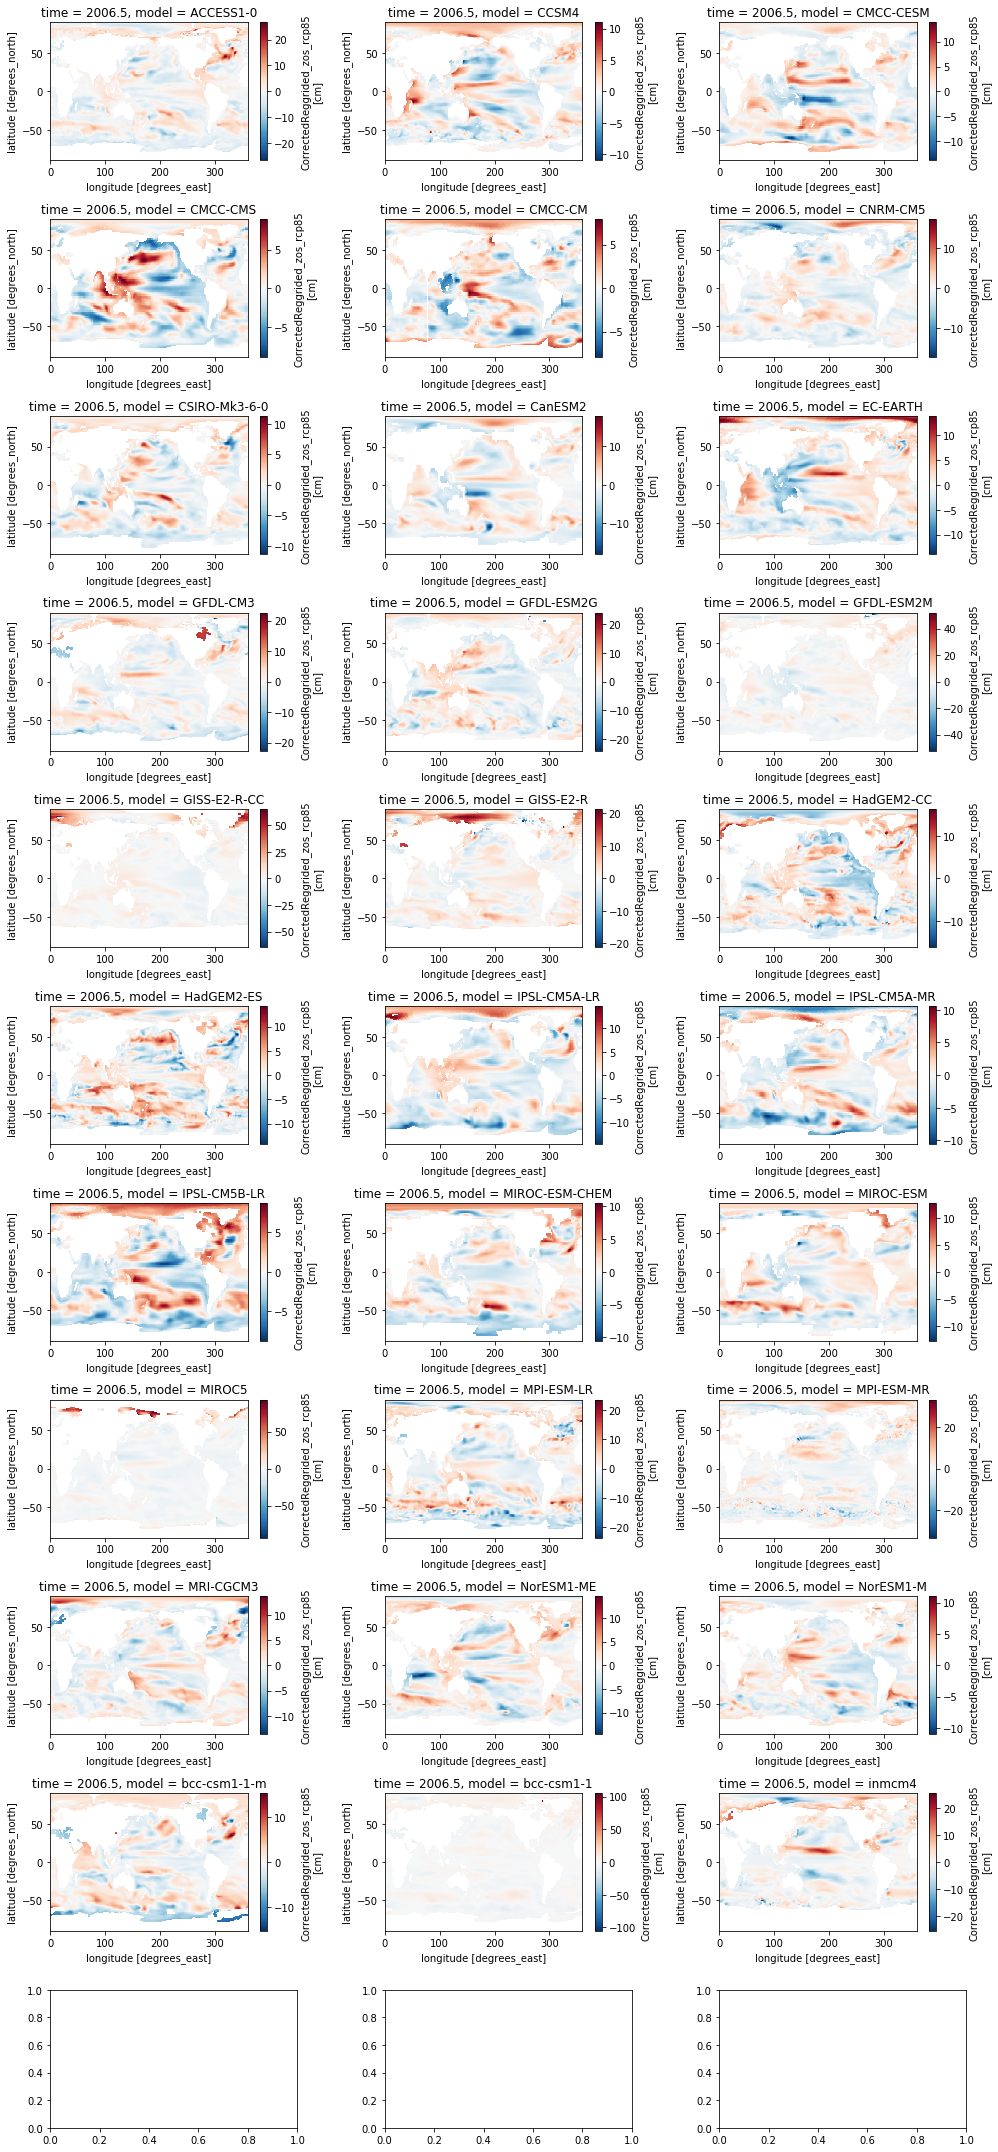

In [6]:
nb_cols = 3
nb_rows = int(len(cmip5_zos.model)/nb_cols)+1
fig, axes = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(14,30))
#axes.set_ylim([-12,25])

for idx, mod in enumerate(cmip5_zos.model):
    cmip5_zos['CorrectedReggrided_zos_rcp85'].isel(time=0,model=idx).plot(
        ax=axes[int(idx/nb_cols),idx%nb_cols])
fig.tight_layout()